<a href="https://colab.research.google.com/github/Carol-Coutinho/PFG_Caroline/blob/main/PFG_Caroline_Coutinho_v04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulação de um reator de pirólise de pneu para geração de gás pirolítico.

Autor: Caroline Brito Coutinho

Orinetador: Prof$ ^a $. Dr$ ^a $. Carin von Mühlen.

Coorientador: Prof. Dr. Alexandre Rodrigues Tôrres.


FAT-UERJ / 2022

## Parte 1: Explanação teórica.

A pirólise é um processo onde diversos materiais podem ser degradados termicamente sem ou com pouca presença de oxigênio. Apesar de ser endotérmico, esse processo pode gerar insumos energéticos valiosos como: carvão, óleo de pirólise e gás de pirolítico. 

Portanto, esse processo tem ganhado visibilidade em relação ao reaproveitamento de resíduos, de modo que esses materiais se tornam insumos e são capazes de gerar energia ao invés de serem descartados em aterros sanitários. 

Além disso, a pirólise apresenta flexibilidade em relação aos seus parâmetros de processo, o que permite a otimização para uma maior eficiência em relação aos produtos obtidos. 

A seguir são apresentados os produtos da pirólise e suas utilidades (SCHWALM et al., 2020).

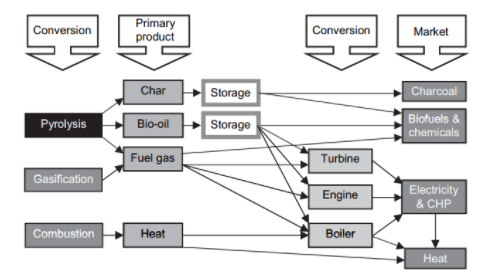

Pensando nisso, os pneus descartados representam grande parcela dos resíduos industriais que são difíceis de degradar, são cerca de 450 mil toneladas por ano, nos quais 53,2% são irreversíveis, ou seja, não possuem as características necessárias para a reutilização (SEST SENAT, 2020). 

Dessa forma, uma das alternativas encontradas para o reaproveitamento dos pneus descartados é a pirólise desse material com o objetivo de se obter a matéria volátil altamente energética.  

Se tratando da pirólise especificamente de pneus, diversos estudos trazem informações valiosas acerca de composição de partida, composição dos produtos, parâmetros que afetam a eficiência do processo e até mesmo modelos matemáticos responsáveis por descrever os fenômenos que acontecem dentro dos reatores de pirólise. 


##**Objetivo:**

Este estudo propõe o uso de pneus irreversíveis como matéria-prima em um reator de pirólise para geração de energia. 
O objetivo é buscar uma solução que possa unir a aplicabilidade de um resíduo industrial na geração de energia causando um menor impacto ambiental.

Como objetivos específicos pretende-se: 

- Elaborar e testar um modelo para a reação de decomposição dos polímeros presentes no pneu a partir de modelos cinéticos propostos na literatura;
- Simular um reator de pirólise de pneu;
- Avaliar a sensibilidade dos principais parâmetros associados ao processo de pirólise no reator.







## Parte 2: Modelagem do problema.

O modelo utilizado para a otimização desse sistema é baseado no artigo de Aylón.E et al. (2010). 

A equação a seguir descreve a conversão total do sólido em produto dentro do reator ao longo do tempo e será a função objetivo com a qual iremos trabalhar dentro do aspecto de otimização.

$$ \ (1) \ \frac{dX}{dt} = \frac{L \cdot S}{t_m \cdot m_0} \cdot \rho(X) \cdot f(\vec{x})$$

Onde: 

- L: comprimento do reator [$m$];
- S: seção circular do reator em [$m^2$];
- t_m: tempo de residência do sólido no reator [$s$];
- m_0: vazão mássica de pneu inserida no reator [$kg\ s^{-1}$];
- $\rho(X)$: densidade do sólido que depende da conversão ($X$) [$kg \ m^{-3}$];
- $f(\vec{x})$: taxa de reação proveninete da equação cinética [$s^{-1}$].




A taxa de reação é dada pela seguinte equação elaborada por Aylón.E et al. (2005):

$$ \ (2) \ f(\vec{x}) = \sum_{i=1}^{N}\Big(c_i K_{0i}e^{-\frac{E_{ai}}{RT}}(1-X_i)^ni\Big) $$

Onde: 

- $X_i$: conversão em fração molar do sólido por componente;
- t: tempo de reação [$s$];
- R: cte universal do gás [$J \ (K \ mol)^{-1}$];
- T: Temperatura de reação [$K$]; 
- $k_{0i}$: fator de frequência para cada componente i [$s^{-1}$]; 
- $E_{ai}$: energia de ativação para cada componente i [$kJ \ mol^{-1}$];
- $n_i$: ordem da reação; 
- $c_i$: coeficiente que expressa a contribuição para cada reação na perda de massa total.


A densidade será estimada através de uma equação linerar levando em consideração as densidades do pneu e do carvão formado ao final do processo de pirólise.

Com base nessas equações serão adotadas algumas hipóteses para a simulação e otimização desse modelo:

- Os parâmetros koi, Eai e  ni são dependentes da temperatura e portanto são estimados através de dados experimentais. Neste estudo esses valores serão considerados constantes e representados na tabela 1;

- O parâmetro $c_i$ será estimado utilizando dados experimentais.
                                                                      
- A composição final do gás de pirólise é dada pela tabela 2;

- A composição inicial do pneu é dada pela tabela 3;

- As faixas de valores utilizadas para os parâmetros de processo foram retiradas da tabela 4.


Tabela 1: Parâmetros cinéticos (AYLÓN.E et al., 2005).

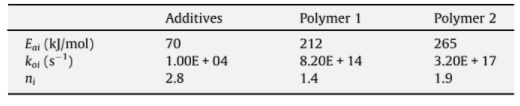

Tabela 2: Composição do gás de pirólise adotada (Traduzida de PARTHASARATHY et al., 2016)

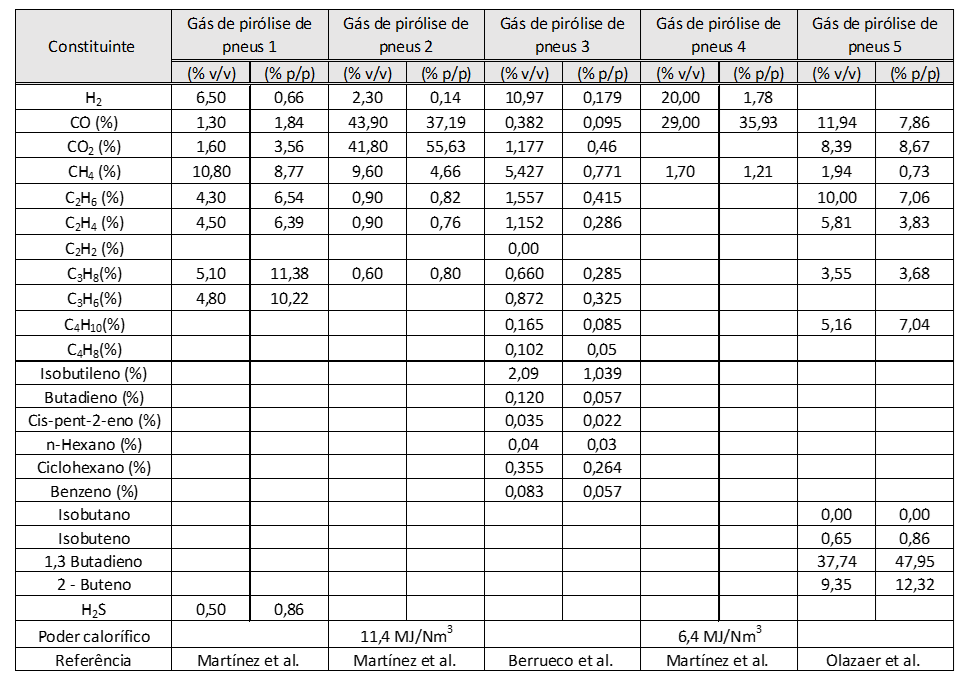




Tabela 3: Composição inicial presente no pneu (Traduzido de PARTHASARATHY et al., 2016).

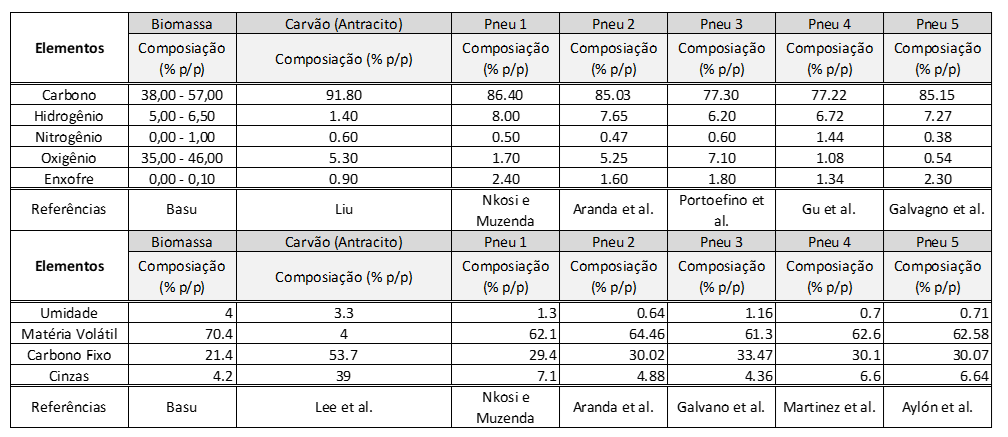

Tabela 4: Referência para as variáveis de processo (Adaptado de ROY e DIAS, (2017); JESUS et al., (2020)).

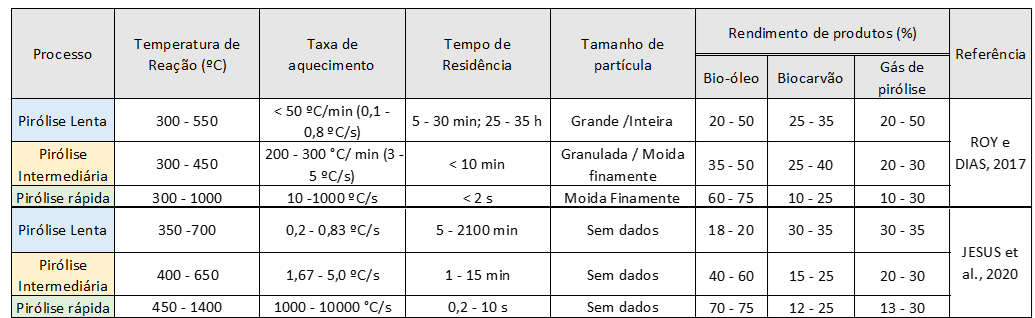

## Parte 3: Simulação do reator de pirólise

Nessa etapa iremos iniciar as etapas matemáticas de simulação do reator.

In [ ]:
# Preparando o Kernel

import numpy as np
import math as mth
import matplotlib as plt
import scipy as sp
import pandas as pd

## Etapa 3.1: Estimação dos parâmetros ($c_i$) :

Esse parâmetro está presente na função cinética e nessa etapa será estimado através de dados experimentais contidos no artigo de AYLÓN. E et al. (2005).

São mostrados no gráfico a seguir os dados de taxa de reação para o aditivo, polímero 1, polímero 2 e experimental em função da temperatura.

Dessa forma, voltando a função cinética definida inicialmente, temos:

As funções para cada taxa de reação separadamente sendo a primeira para o aditivo, a segunda para o polímiero 1 e a terceira para o polímero 2.

$$ \frac{dX_1}{dt} =  K_{1}e^{-\frac{E_{1}}{RT}}(1-X_1)^{n_1} $$

$$ \frac{dX_2}{dt} =  K_{2}e^{-\frac{E_{2}}{RT}}(1-X_2)^{n_2} $$

$$ \frac{dX_3}{dt} =  K_{3}e^{-\frac{E_{3}}{RT}}(1-X_3)^{n_3} $$


Dessa forma, podemos definir nossa função objetivo para essa estimação que, nesse caso, será o somatório das funções de cada componente separado multiplicado por um fator de contribuição (c). Esse fator será o alvo da estimação.

$$ \frac{d\, X}{dt}= c_1 \cdot \frac{dX_1}{dt} + c_2 \cdot \frac{dX_2}{dt} + c_3 \cdot \frac{dX_3}{dt}$$

Gráfico com os dados experimentais da taxa de reação de acordo com a temperatura (AYLÓN. E et al.,2005):

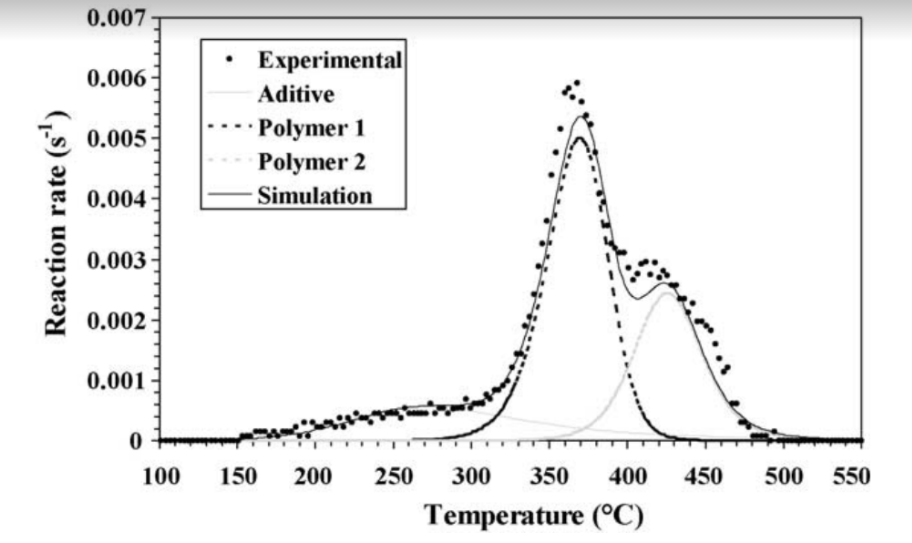

Importando os dados do gráfico acima:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importando os dados do arquivo csv (Taxa de reação total):

# Leitura do banco de dados para o kernel
path_1 = '/content/drive/MyDrive/PFG_Caroline/Caroline_pirolise_pneu/'
# path_2 = '/content/drive/Shareddrives/PFG_Caroline/Caroline_pirolise_pneu/'
dados = pd.read_csv(path_1 + "Exp_total.csv", sep=";")
dados.shape

(100, 2)

In [ ]:
# Revisando os dados:

dados.columns

Index(['Temperatura', 'Taxa_rea'], dtype='object')

In [ ]:
dados.head()

,Temperatura,Taxa_rea
0,102.567,1.260000e-07
1,107.271,1.138000e-05
2,122.242,2.310000e-05
3,131.224,3.460100e-05
4,137.212,3.490000e-05


In [ ]:
# Importando os dados do arquivo csv (Taxa de reação aditivo):

dados_adit = pd.read_csv(path_1 + "Aditivo.csv", sep=";")
dados_adit.shape

(100, 2)

In [ ]:
# Revisando os dados:

dados_adit.head()

,Temperatura,Taxa_rea
0,146.5,0.000013
1,148.5,0.000013
2,151.0,0.000013
3,153.5,0.000013
4,155.0,0.000013


In [ ]:
# Importando os dados do arquivo csv (Taxa de reação Polímero 1):
dados_p1 = pd.read_csv(path_1 + "Polímero_1.csv", sep=";")
dados_p1.shape

(100, 2)

In [ ]:
# Revisando os dados:

dados_p1.head()

,Temperatura,Taxa_rea
0,259.5,0.000026
1,264.5,0.000026
2,267.0,0.000039
3,269.0,0.000039
4,272.0,0.000039


In [ ]:
# Importando os dados do arquivo csv (Taxa de reação Polímero 2):

dados_p2 = pd.read_csv(path_1 + "Polímero_2.csv", sep=";")
dados_p2.shape

(100, 2)

In [ ]:
# Revisando os dados:

dados_p2.head()

,Temperatura,Taxa_rea
0,332.0,0.000026
1,335.0,0.000013
2,336.5,0.000013
3,338.5,0.000013
4,340.5,0.000026


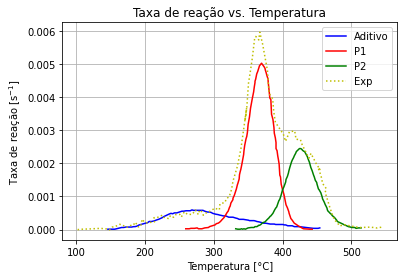

In [ ]:
# Plotando o gráfico com os dados importados:

import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.plot(dados_adit['Temperatura'], dados_adit['Taxa_rea'], 'b-', label='Aditivo')
ax1.plot(dados_p1['Temperatura'], dados_p1['Taxa_rea'], 'r-', label='P1')
ax1.plot(dados_p2['Temperatura'], dados_p2['Taxa_rea'], 'g-', label='P2')
ax1.plot(dados['Temperatura'], dados['Taxa_rea'], 'y:', label='Exp')
#ax1.plot(C_A_eq_teste[:,0], q_A_prev, 'r-', label='mod')
# Adicionando texto nos eixos - descrição
ax1.set_xlabel('Temperatura [°C]')
ax1.set_ylabel('Taxa de reação [s$^{-1}$]')
# Adicionando título para a figura
ax1.set_title('Taxa de reação vs. Temperatura')
# Adicionando uma legenda
ax1.legend()
ax1.grid()

Observe que para a estimação de parâmetros os dados devem começar todos no mesmo ponto, logo, iremos pegar os valores de mínimo das curvas do aditivo, polímero 1 e polímero 2 e utilizar uma função de interpolação linear para reajustar as curvas. 

In [ ]:
# Encontrando o mínimo de temperatura de cada curva:

dados_adit['Temperatura'].min(),dados_p1['Temperatura'].min(),dados_p2['Temperatura'].min()

(146.5, 259.5, 332.0)

In [ ]:
npi = 100
T_dados_intpld = np.linspace(100.0, 550.0, num=npi)

In [ ]:
T_dados_intpld

array([100.        , 104.54545455, 109.09090909, 113.63636364,
       118.18181818, 122.72727273, 127.27272727, 131.81818182,
       136.36363636, 140.90909091, 145.45454545, 150.        ,
       154.54545455, 159.09090909, 163.63636364, 168.18181818,
       172.72727273, 177.27272727, 181.81818182, 186.36363636,
       190.90909091, 195.45454545, 200.        , 204.54545455,
       209.09090909, 213.63636364, 218.18181818, 222.72727273,
       227.27272727, 231.81818182, 236.36363636, 240.90909091,
       245.45454545, 250.        , 254.54545455, 259.09090909,
       263.63636364, 268.18181818, 272.72727273, 277.27272727,
       281.81818182, 286.36363636, 290.90909091, 295.45454545,
       300.        , 304.54545455, 309.09090909, 313.63636364,
       318.18181818, 322.72727273, 327.27272727, 331.81818182,
       336.36363636, 340.90909091, 345.45454545, 350.        ,
       354.54545455, 359.09090909, 363.63636364, 368.18181818,
       372.72727273, 377.27272727, 381.81818182, 386.36

In [ ]:
def f_coef_reta_2p(p1, p2):

  ''' Definindo a função dos coeficientes da reta''' 
  ''' p1 = tupla na forma (x1,y1) '''

  x1 = p1[0]
  y1 = p1[1]
  x2 = p2[0]
  y2 = p2[1]
  #
  a = (y2 - y1)/(x2 - x1)
  b = y1 - a*x1
  #
  return (a,b)

In [ ]:
def f_intp_tab(x, strg_x, strg_y, tabela):

  ''' Definindo a função interpoladora'''

  # localiza i_inf e i_sup
  i_inf = tabela.index[tabela[strg_x] < x][-1]
  i_sup = tabela.index[tabela[strg_x] >= x][ 0]
  # cria p1 e p2
  p1 = (tabela[strg_x][i_inf], tabela[strg_y][i_inf])
  p2 = (tabela[strg_x][i_sup], tabela[strg_y][i_sup])
  # obtém os valores de a e b
  a, b = f_coef_reta_2p(p1, p2)
  y = a*x + b
  return y

In [ ]:
m_tr = np.zeros((npi,4))
m_tr.shape

(100, 4)

In [ ]:
''' Criando uma interação para aplicar a função interpoladora em cada curva'''

for i in range(npi):
  j = 0
  tabela = dados.copy()
  T_min = tabela['Temperatura'].min()
  T_max = tabela['Temperatura'].max()
  T_vez = T_dados_intpld[i]
  if ((T_vez>=T_min)and(T_vez<=T_max)):
    m_tr[i,j] = f_intp_tab(T_vez, 'Temperatura', 'Taxa_rea', tabela)
  j = 1
  tabela = dados_adit.copy()
  T_min = tabela['Temperatura'].min()
  T_max = tabela['Temperatura'].max()
  T_vez = T_dados_intpld[i]
  if ((T_vez>=T_min)and(T_vez<=T_max)):
    m_tr[i,j] = f_intp_tab(T_vez, 'Temperatura', 'Taxa_rea', tabela)
  j = 2
  tabela = dados_p1.copy()
  T_min = tabela['Temperatura'].min()
  T_max = tabela['Temperatura'].max()
  T_vez = T_dados_intpld[i]
  if ((T_vez>=T_min)and(T_vez<=T_max)):
    m_tr[i,j] = f_intp_tab(T_vez, 'Temperatura', 'Taxa_rea', tabela)
  j = 3
  tabela = dados_p2.copy()
  T_min = tabela['Temperatura'].min()
  T_max = tabela['Temperatura'].max()
  T_vez = T_dados_intpld[i]
  if ((T_vez>=T_min)and(T_vez<=T_max)):
    m_tr[i,j] = f_intp_tab(T_vez, 'Temperatura', 'Taxa_rea', tabela)

Com todas a funções montadas iremos aplicar aos dados iniciais e criar um dataframe com os dados resultantes.   

In [ ]:
dados_obj_c_new = pd.DataFrame({'y_dados': m_tr[0:100, 0], 'x_ad': m_tr[0:100, 1], 'x_p1':m_tr[0:100, 2],
                            'x_p2': m_tr[0:100, 3]})
dados_obj_c_new.head()

,y_dados,x_ad,x_p1,x_p2
0,0.000000,0.0,0.0,0.0
1,0.000005,0.0,0.0,0.0
2,0.000013,0.0,0.0,0.0
3,0.000016,0.0,0.0,0.0
4,0.000020,0.0,0.0,0.0


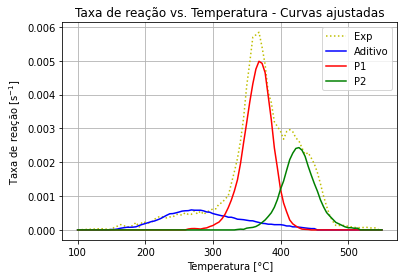

In [ ]:
# Plotando o novo gráfico:
import matplotlib.pyplot as plt
fig2, ax2 = plt.subplots()
ax2.plot(T_dados_intpld, dados_obj_c_new['y_dados'], 'y:', label='Exp')
ax2.plot(T_dados_intpld, dados_obj_c_new['x_ad'], 'b-', label='Aditivo')
ax2.plot(T_dados_intpld, dados_obj_c_new['x_p1'], 'r-', label='P1')
ax2.plot(T_dados_intpld, dados_obj_c_new['x_p2'], 'g-', label='P2')
# Adicionando texto nos eixos - descrição
ax2.set_xlabel('Temperatura [°C]')
ax2.set_ylabel('Taxa de reação [s$^{-1}$]')
# Adicionando título para a figura
ax2.set_title('Taxa de reação vs. Temperatura - Curvas ajustadas')
# Adicionando uma legenda
ax2.legend()
ax2.grid()

Definindo a função objetivo de estimação de parâmetro:

$$ fun_{obj} = par_0 \cdot x_0 + par_2 \cdot x_2 + par_2 \cdot x_2 $$

In [ ]:
def fun_obj_c (x,par):

  '''   Entrada:
        x1,x2,x3 = valores das funções de variáveis independentes
        par = vetor ou lista de parâmetros
        Saida:
        fun = valor da função no ponto x
  '''
  
  fun = par[0]*x[0] + par[1]*x[1] + par[2]*x[2]
  return fun

In [ ]:
# Chute inicial para os valores dos parâmetros:
par_c = np.array([1/3, 1/3, 1/3])
par_c

array([0.33333333, 0.33333333, 0.33333333])

Iremos agora definir a função de resíduo: 

$$ Δ = y - y_{pred} $$

Onde o $ y_{pred} $ é dados pela função objetivo definida anteriormente aplicada aos dados da tabela do aditivo, polímero 1 e polímero 2. 

In [ ]:
def f_res_c(v_par, dados_obj_c_new):
  
  '''Definindo a função de resíduo'''

  n_exp = dados_obj_c_new.shape[0]
  v_delta =np.empty(n_exp)
  for k, row in dados_obj_c_new.iterrows():
    y = row['y_dados']
    y_pred = fun_obj_c([row['x_ad'], row['x_p1'], row['x_p2']], v_par)
    delta = y - y_pred
    v_delta[k] = delta
  #v_delta = (np.array(v_par).sum()!= 1.0)*1000.0 + v_delta
  return v_delta

In [ ]:
# Definindo o tamanho do vetor de resposta:

n_exp = dados_obj_c_new.shape[0]
n_exp

100

In [ ]:
v_par_c = list(par_c)
v_par_c

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

In [ ]:
# Testando a função de resíduo:

f_res_c(v_par_c, dados_obj_c_new)

array([0.00000000e+00, 4.85931791e-06, 1.28047101e-05, 1.63631048e-05,
       1.99214995e-05, 2.37213674e-05, 2.95415937e-05, 3.46306694e-05,
       3.48576385e-05, 2.87353011e-05, 1.25308689e-05, 1.26273699e-05,
       7.55374160e-05, 1.03779077e-04, 1.40825052e-04, 1.08965906e-04,
       5.61080453e-05, 7.92646001e-05, 9.82151897e-05, 1.93121213e-04,
       3.89462817e-05, 1.79947016e-04, 1.60671626e-04, 1.34945551e-04,
       1.39111737e-04, 2.27332024e-04, 2.70617414e-04, 2.93972763e-04,
       2.46894999e-04, 2.10014416e-04, 2.23823962e-04, 2.22320510e-04,
       2.90892488e-04, 2.83063882e-04, 2.48886267e-04, 3.20174839e-04,
       2.61591853e-04, 2.49973197e-04, 3.59617694e-04, 2.63716353e-04,
       3.57350304e-04, 2.53518191e-04, 3.36768979e-04, 3.58198817e-04,
       4.19049061e-04, 4.10376101e-04, 5.47952776e-04, 5.54436367e-04,
       6.25928675e-04, 6.57886274e-04, 9.48707471e-04, 1.22444209e-03,
       1.50799036e-03, 1.87058181e-03, 2.34540933e-03, 3.08173800e-03,
      

Observa-se que os valores de resíduos retornados são bem baixos.


Agora iremos utilizar o método dos mínimos quadrados na função de resíduo de modo a minimizar o resíduo para os parâmetros testados. 

In [ ]:
# Importando o método de mínimos quadrados:

from scipy.optimize import least_squares

In [ ]:
# Aplicando o método dos mínimos quadrados na função resíduo: 

res_estimacao_c = least_squares(f_res_c, np.array([1/3,1/3,1/3]), args=(dados_obj_c_new,))
res_estimacao_c.x

array([0.95577299, 1.07822657, 1.12205916])

In [ ]:
# Resultado dos parâmetros estimados:
c = res_estimacao_c.x
c

array([0.95577299, 1.07822657, 1.12205916])

Logo encontramos:

|C_Novo|
|-------|
$$c_1 = 0.9557$$
$$c_2 = 1.0782$$
$$c_3 = 1.1220$$

In [ ]:
# Calculando o y predito:
Y_pred_c = np.empty(n_exp)
for k, row in dados_obj_c_new.iterrows():
  Y_pred_c[k] = fun_obj_c([row['x_ad'], row['x_p1'], row['x_p2']], c)
Y_pred_c

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.23667467e-05,
       1.23667467e-05, 2.51831933e-05, 4.76681873e-05, 6.18337335e-05,
       7.42004803e-05, 7.42004803e-05, 7.75732294e-05, 8.83660265e-05,
       1.24470503e-04, 1.53849248e-04, 1.79793471e-04, 2.05962545e-04,
       2.34968187e-04, 2.52056783e-04, 2.85559424e-04, 3.20551725e-04,
       3.68191873e-04, 4.14934716e-04, 4.56445474e-04, 4.61617023e-04,
       4.82303217e-04, 5.05387811e-04, 5.31770204e-04, 5.40924809e-04,
       5.72039302e-04, 6.07576072e-04, 6.00893802e-04, 5.94552358e-04,
       5.84406049e-04, 5.89431694e-04, 5.73319250e-04, 6.07646051e-04,
       6.01203729e-04, 6.38102687e-04, 6.68393797e-04, 7.56460490e-04,
       8.96669246e-04, 1.06697499e-03, 1.30816122e-03, 1.57794934e-03,
       1.91502565e-03, 2.44626259e-03, 3.09234716e-03, 3.74982866e-03,
      

In [ ]:
# Adicionando os dados preditos no dataframe:

dados_obj_c_new['Y_pred_c'] = Y_pred_c
dados_obj_c_new

,y_dados,x_ad,x_p1,x_p2,Y_pred_c
0,0.000000,0.0,0.0,0.0,0.0
1,0.000005,0.0,0.0,0.0,0.0
2,0.000013,0.0,0.0,0.0,0.0
3,0.000016,0.0,0.0,0.0,0.0
4,0.000020,0.0,0.0,0.0,0.0
...,...,...,...,...,...
95,0.000064,0.0,0.0,0.0,0.0
96,0.000051,0.0,0.0,0.0,0.0
97,0.000064,0.0,0.0,0.0,0.0
98,0.000000,0.0,0.0,0.0,0.0


Avaliando a consistência dos parâmetros estimados através de figuras de mérito:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(dados_obj_c_new['y_dados'], dados_obj_c_new['Y_pred_c'])
rmse = np.sqrt(mse)

In [ ]:
print('Erro quadrático médio:', rmse)
print('Coeficiente de determinação:', r2_score(dados_obj_c_new['y_dados'], dados_obj_c_new['Y_pred_c']))

Erro quadrático médio: 0.00020163959928297482
Coeficiente de determinação: 0.9827565031199553


## Etapa 3.2: Definição da função densidade.

Segundo o artigo de referência a densidade do material inserido no reator depende da conversão, sendo que:

- No instante inicial a densidade é igual a densidade do pneu;
- No instante final a densidade é igual a do carvão;

Para uma primeira abordagem iremos assumir que a função é linear, onde a densidade varia linermente com a conversão.

rho_pneu: 920 Kg/m3 (H. Widell, 2013)

rho_carvão: 100 Kg/m3 (N.Nkosi, 2021)

$$f(x) = a \cdot x \ + \ b$$
$$d = a \cdot conv \ + \ b$$

Sendo d = 20 pontos entre a densidade do pneu e a do carvão.

Sendo conv = 20 pontos de 0 a 1.

In [ ]:
rho_pneu = 920 # [Kg/m3]
rho_char = 100 # [Kg/m3]

In [ ]:
# Construindo a faixa dos valores de conversão:

conv_rho = np.array([0,1]) 
conv_rho_faixa = np.linspace(conv_rho[0],conv_rho[1],20)
conv_rho_faixa

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [ ]:
# Construindo a faixa dos valores de densidade:

rho = np.array([920,100]) 
rho_faixa = np.linspace(rho[0],rho[1],20)
rho_faixa

array([920.        , 876.84210526, 833.68421053, 790.52631579,
       747.36842105, 704.21052632, 661.05263158, 617.89473684,
       574.73684211, 531.57894737, 488.42105263, 445.26315789,
       402.10526316, 358.94736842, 315.78947368, 272.63157895,
       229.47368421, 186.31578947, 143.15789474, 100.        ])

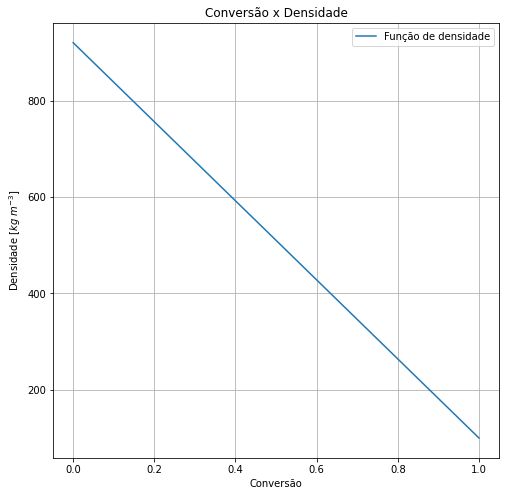

In [ ]:
# Plotando um gráfico da conversão X densidade: 
import matplotlib.pyplot as plt

fig4, ax4 = plt.subplots(figsize =(8,8))
ax4.plot(conv_rho,rho,label='Função de densidade')
# Adicionando texto nos eixos - descrição
plt.title('Conversão x Densidade')
ax4.set_xlabel('Conversão')
ax4.set_ylabel('Densidade [$kg \ m{^{-3}}$]')
ax4.grid()
ax4.legend()

Com posse do gráfico podemos fazer uma regressão linerar e encontrar os coeficientes da reta linerar proposta.

In [ ]:
# Importando os pacotes necessários: 

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
# Criando o modelo linear e aplicando a regressão:
lm_model = LinearRegression()
lm_model.fit(conv_rho.reshape(-1,1), rho)
 
# Extraindo os coeficientes:
slope = lm_model.coef_
intercept = lm_model.intercept_


In [ ]:
print('Coeficiente angular:', slope[0])
print('Coeficiente linear:', intercept)


Coeficiente angular: -819.9999999999998
Coeficiente linear: 919.9999999999999


In [ ]:
# Criando um vetor com os coeficientes: 

coef_rho = np.array([slope[0], intercept])
coef_rho

array([-820.,  920.])

Logo temos a função da densidade definida como:

$$f(x) = -819.9 \cdot x \ + \ 919.999$$

In [ ]:
def fun_rho(X):
  
  ''' Definindo a equação de densidade'''

  y = coef_rho[1] + X*coef_rho[0]
  return y

## Etapa 3.3: Verificando o modelo do reator proposto.

Relembrando a equação do modelo integrado: 

$$ \ (1) \ \frac{dX}{dt} = \frac{L \cdot S}{t_m \cdot m_0} \cdot \rho(X) \cdot f(\vec{x})$$

In [ ]:
# Definindo parâmetros iniciais: 

S = 0.5 # m2
tm = 131 # s
m_alim = 3.5/(60*60)  # kg/s 

In [ ]:
# Definindo a faixa do comprimento do reator:
L_reator = np.array((0,1)) # m
L = np.linspace(L_reator[0], L_reator[1], 20)
L

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

Primeiro iremos inserir os dados cinéticos e construir a função cinética $f(x)$.

In [ ]:
# Inserindo os dados cinéticos iniciais:

# Ordem no vetor: [Aditivo, Polímero 1, Polímero 2]

k_c = np.array((1.0e+4, 8.20e+14, 3.20e+17)) #s-1
E_0 = np.array((70.0*10**3, 212.0*10**3, 265.0*10**3)) #J/mol
n = np.array((2.8,1.4,1.9))


In [ ]:
def fun_cin (Temp, c, k, E, n, x):

  ''' Definindo a função cinética'''

  R = 8.315 # J/K.mol ou J/°C.mol 

  f = ((c[0]*k[0]*np.exp(-(E[0]/(R*Temp)))*(1-x[0])**n[0]) +
      (c[1]*k[1]*np.exp(-(E[1]/(R*Temp)))*(1-x[1])**n[1]) +
       (c[2]*k[2]*np.exp(-(E[2]/(R*Temp)))*(1-x[2])**n[2]))
  return f

In [ ]:
# Inserindo dados de teste para conversão cinética e temperatura do reator: 
x_cin = np.array([0.3,0.4,0.3])
T_reator = np.array([700.0, 400.0, 800]) #ºC
 

In [ ]:
# Testando a função cinética: 

fun_cin (T_reator[0], c, k_c, E_0, n, x_cin)

0.08985325477797457

In [ ]:
from scipy import integrate
from scipy.integrate import quad

def Conv_total(t, y, L, S, tm, m0, T):

  '''Função que calcula a conversão de cada um dos componentes e a conversão total '''
  #
  # Definindo parâmetos cinéticos:
  #
  k = k_c
  E = E_0
  R = 8.315     # J/K.mol
  #
  # Definindo os vetores de conversão:
  #
  X1 = y[0]     # Aditivo
  X2 = y[1]     # Polímero 1
  X3 = y[2]     # Polímero 2
  Xt = y[3]     # Conversão total
  #
  # Trazendo as funções de densidade e taxa de reação:
  #
  x_cin = np.array([X1, X2, X3])
  rho = fun_rho(Xt)
  taxa_cin = fun_cin(T, c, k, E, n, x_cin)
  #
  # Formando a função a ser integrada:
  #
  dydt = np.zeros((4,))
  dydt[0] = (c[0]*k[0]*np.exp(-(E[0]/(R*T)))*(1-X1)**n[0])
  dydt[1] = (c[1]*k[1]*np.exp(-(E[1]/(R*T)))*(1-X2)**n[1])
  dydt[2] = (c[2]*k[2]*np.exp(-(E[2]/(R*T)))*(1-X3)**n[2])
  dydt[3] = ((L*S)/(tm*m0))*rho*taxa_cin
  return dydt


In [ ]:
# Valor inicial de conversões: 

y0 = np.array([ 0.0, 0.0, 0.0, 0.0])

In [ ]:
# Testando a função do simulador:
Conv_total(0, y0, L[-1], S, tm, m_alim, T_reator[0])

array([5.71913458e-02, 1.34344937e-01, 6.05741751e-03, 7.13664488e+02])

In [ ]:
# Testando o simulador:

t_span = [0, tm]
tcalc = np.linspace(0,tm,10)
sol_1 = integrate.solve_ivp(Conv_total, t_span, y0, t_eval= tcalc,
              args= (L[-1], S, tm, m_alim, T_reator[0]))
sol_1

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 14708
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  0.        ,  14.55555556,  29.11111111,  43.66666667,
        58.22222222,  72.77777778,  87.33333333, 101.88888889,
       116.44444444, 131.        ])
 t_events: None
        y: array([[0.        , 0.39872188, 0.53685847, 0.6119423 , 0.66059366,
        0.69529368, 0.72159678, 0.74239365, 0.7593542 , 0.77351821],
       [0.        , 0.76416004, 0.90503854, 0.95119054, 0.97112945,
        0.98128928, 0.98706922, 0.99062762, 0.99295252, 0.99454363],
       [0.        , 0.08134586, 0.15097731, 0.21122155, 0.26383155,
        0.31015221, 0.35123215, 0.38790068, 0.42082213, 0.45053472],
       [0.        , 1.12303352, 1.12183037, 1.12175474, 1.12285697,
        1.12212662, 1.12161798, 1.12208859, 1.12330505, 1.1217142 ]])
 y_events: None

In [ ]:
dados_1 = pd.DataFrame(sol_1["y"])
dados_1

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.398722,0.536858,0.611942,0.660594,0.695294,0.721597,0.742394,0.759354,0.773518
1,0.0,0.764160,0.905039,0.951191,0.971129,0.981289,0.987069,0.990628,0.992953,0.994544
2,0.0,0.081346,0.150977,0.211222,0.263832,0.310152,0.351232,0.387901,0.420822,0.450535
3,0.0,1.123034,1.121830,1.121755,1.122857,1.122127,1.121618,1.122089,1.123305,1.121714


In [ ]:
dados_1_tr = dados_1.transpose()
dados_1_tr

,0,1,2,3
0,0.000000,0.000000,0.000000,0.000000
1,0.398722,0.764160,0.081346,1.123034
2,0.536858,0.905039,0.150977,1.121830
3,0.611942,0.951191,0.211222,1.121755
4,0.660594,0.971129,0.263832,1.122857
5,0.695294,0.981289,0.310152,1.122127
6,0.721597,0.987069,0.351232,1.121618
7,0.742394,0.990628,0.387901,1.122089
8,0.759354,0.992953,0.420822,1.123305
9,0.773518,0.994544,0.450535,1.121714


Gerando o gráfico do resultado de simulação para cada polímeiro dentro do reator para a temperatura média:

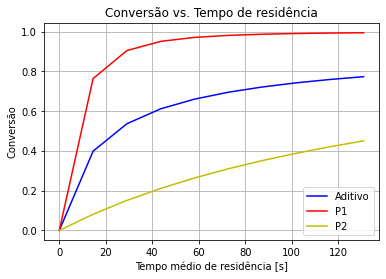

In [ ]:
# Plotando o gráfico
import matplotlib.pyplot as plt
fig5, ax5 = plt.subplots()
ax5.plot(tcalc, dados_1_tr[0], 'b-', label='Aditivo')
ax5.plot(tcalc, dados_1_tr[1], 'r-', label='P1')
ax5.plot(tcalc, dados_1_tr[2], 'y-', label='P2')
# Adicionando texto nos eixos - descrição
ax5.set_xlabel('Tempo médio de residência [s]')
ax5.set_ylabel('Conversão')
# Adicionando título para a figura
ax5.set_title('Conversão vs. Tempo de residência')
# Adicionando uma legenda
ax5.legend()
ax5.grid()

Testando para a conversão total considerando a temperatura média e a temperatura mais alta de 823 K:

In [ ]:
# Temperatura de 400 °C
t_span = [0, tm]
tcalc = np.linspace(0,tm,10)
sol_2 = integrate.solve_ivp(Conv_total, t_span, y0, t_eval= tcalc,
              args= (L[-1], S, tm, m_alim, T_reator[1]))
sol_2

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 56
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  0.        ,  14.55555556,  29.11111111,  43.66666667,
        58.22222222,  72.77777778,  87.33333333, 101.88888889,
       116.44444444, 131.        ])
 t_events: None
        y: array([[0.00000000e+00, 1.00700017e-04, 2.01371646e-04, 3.02014900e-04,
        4.02629792e-04, 5.03216335e-04, 6.03774542e-04, 7.04304427e-04,
        8.04806003e-04, 9.05279282e-04],
       [0.00000000e+00, 2.67622828e-12, 5.35245656e-12, 8.02868484e-12,
        1.07049131e-11, 1.33811414e-11, 1.60573697e-11, 1.87335980e-11,
        2.14098262e-11, 2.40860545e-11],
       [0.00000000e+00, 1.30514158e-16, 2.61028316e-16, 3.91542474e-16,
        5.22056633e-16, 6.52570791e-16, 7.83084949e-16, 9.13599107e-16,
        1.04411327e-15, 1.17462742e-15],
       [0.00000000e+00, 3.10668578e-01, 5.35378387e-01, 6.97516799e-01,
      

In [ ]:
dados_2 = pd.DataFrame(sol_2["y"])
dados_2

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.007000e-04,2.013716e-04,3.020149e-04,4.026298e-04,5.032163e-04,6.037745e-04,7.043044e-04,8.048060e-04,9.052793e-04
1,0.0,2.676228e-12,5.352457e-12,8.028685e-12,1.070491e-11,1.338114e-11,1.605737e-11,1.873360e-11,2.140983e-11,2.408605e-11
2,0.0,1.305142e-16,2.610283e-16,3.915425e-16,5.220566e-16,6.525708e-16,7.830849e-16,9.135991e-16,1.044113e-15,1.174627e-15
3,0.0,3.106686e-01,5.353784e-01,6.975168e-01,8.151315e-01,9.000470e-01,9.611340e-01,1.005629e+00,1.037782e+00,1.060980e+00


In [ ]:
dados_2_tr = dados_2.transpose()
dados_2_tr

,0,1,2,3
0,0.000000,0.000000e+00,0.000000e+00,0.000000
1,0.000101,2.676228e-12,1.305142e-16,0.310669
2,0.000201,5.352457e-12,2.610283e-16,0.535378
3,0.000302,8.028685e-12,3.915425e-16,0.697517
4,0.000403,1.070491e-11,5.220566e-16,0.815132
5,0.000503,1.338114e-11,6.525708e-16,0.900047
6,0.000604,1.605737e-11,7.830849e-16,0.961134
7,0.000704,1.873360e-11,9.135991e-16,1.005629
8,0.000805,2.140983e-11,1.044113e-15,1.037782
9,0.000905,2.408605e-11,1.174627e-15,1.060980


In [ ]:
# Temperatura de 800 °C
t_span = [0, tm]
tcalc = np.linspace(0,tm,10)
sol_3 = integrate.solve_ivp(Conv_total, t_span, y0, t_eval= tcalc,
              args= (L[-1], S, tm, m_alim, T_reator[2]))
sol_3

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 18884
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  0.        ,  14.55555556,  29.11111111,  43.66666667,
        58.22222222,  72.77777778,  87.33333333, 101.88888889,
       116.44444444, 131.        ])
 t_events: None
        y: array([[0.        , 0.67913104, 0.77342798, 0.81676908, 0.84280138,
        0.86057442, 0.87366755, 0.88381348, 0.89196487, 0.89869387],
       [0.        , 0.99997963, 0.99999634, 0.99999866, 0.99999935,
        0.99999963, 0.99999976, 0.99999984, 0.99999988, 0.99999991],
       [0.        , 0.97139942, 0.98645295, 0.99129939, 0.99365519,
        0.99503685, 0.99594064, 0.99657581, 0.99704548, 0.99740621],
       [0.        , 1.12170347, 1.1229121 , 1.12271527, 1.12155746,
        1.12280991, 1.11972597, 1.12237545, 1.12086947, 1.12161063]])
 y_events: None

In [ ]:
dados_3 = pd.DataFrame(sol_3["y"])
dados_3_tr = dados_3.transpose()
dados_3_tr

,0,1,2,3
0,0.000000,0.000000,0.000000,0.000000
1,0.679131,0.999980,0.971399,1.121703
2,0.773428,0.999996,0.986453,1.122912
3,0.816769,0.999999,0.991299,1.122715
4,0.842801,0.999999,0.993655,1.121557
5,0.860574,1.000000,0.995037,1.122810
6,0.873668,1.000000,0.995941,1.119726
7,0.883813,1.000000,0.996576,1.122375
8,0.891965,1.000000,0.997045,1.120869
9,0.898694,1.000000,0.997406,1.121611


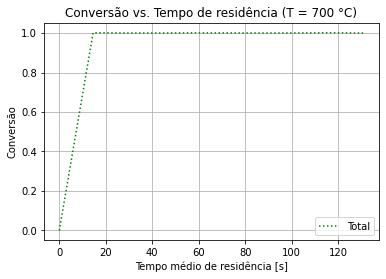

<Figure size 1440x720 with 0 Axes>

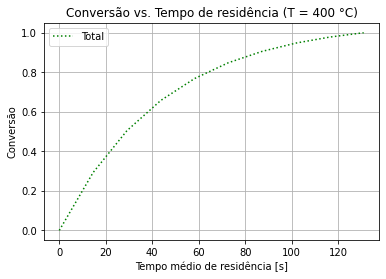

<Figure size 1440x720 with 0 Axes>

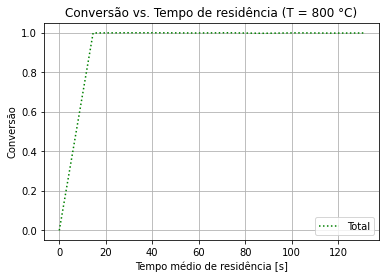

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Gráfico T = 700.0 °C

fig6, ax6 = plt.subplots()
plt.figure(figsize=(20,10))
ax6.plot(tcalc, dados_1_tr[3]/dados_1_tr[3].iloc[-1], 'g:', label='Total')
# Adicionando texto nos eixos - descrição
ax6.set_xlabel('Tempo médio de residência [s]')
ax6.set_ylabel('Conversão')
# Adicionando título para a figura
ax6.set_title('Conversão vs. Tempo de residência (T = 700 °C)')
# Adicionando uma legenda
ax6.legend()
ax6.grid()

# Gráfico T = 400.0 °C 

fig7, ax7 = plt.subplots()
plt.figure(figsize=(20,10))
ax7.plot(tcalc, dados_2_tr[3]/dados_2_tr[3].iloc[-1], 'g:', label='Total')
# Adicionando texto nos eixos - descrição
ax7.set_xlabel('Tempo médio de residência [s]')
ax7.set_ylabel('Conversão')
#ax7.set_ylim(0.0,1.0)
# Adicionando título para a figura
ax7.set_title('Conversão vs. Tempo de residência (T = 400 °C)')
# Adicionando uma legenda
ax7.legend()
ax7.grid()

# Gráfico T = 800.0 °C 

fig8, ax8 = plt.subplots()
plt.figure(figsize=(20,10))
ax8.plot(tcalc, dados_3_tr[3]/dados_3_tr[3].iloc[-1], 'g:', label='Total')
# Adicionando texto nos eixos - descrição
ax8.set_xlabel('Tempo médio de residência [s]')
ax8.set_ylabel('Conversão')
#ax7.set_ylim(0.0,1.0)
# Adicionando título para a figura
ax8.set_title('Conversão vs. Tempo de residência (T = 800 °C)')
# Adicionando uma legenda
ax8.legend()
ax8.grid()


## Etapa 3.4: Estimação dos parâmetros da curva de temperatura da partícula no interior do reator em função do tempo.

Para isso iremos utilizar novamente o processo de estimação de parâmetros. 

Os dados serão retirados do gráfico 5 do artigo de AYLÓN. E et al. (2010).

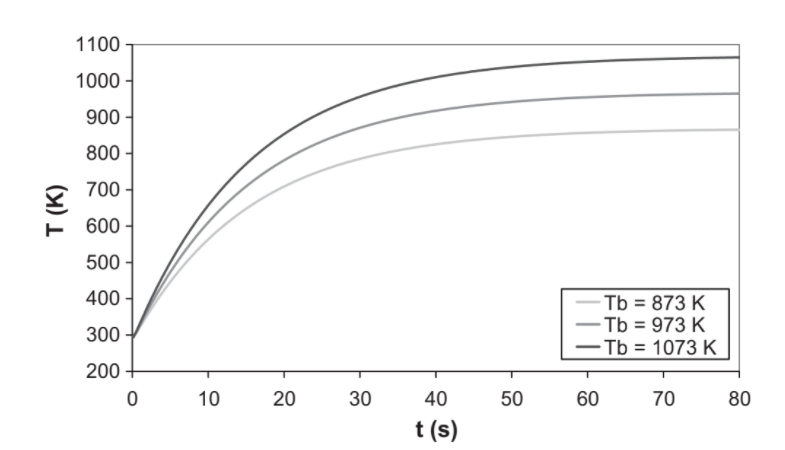

Como as curvas presentes no gráfico parecem representar uma função de crescimento logístico, onde há um rápido crescimento exponencial até um certo patamar onde há uma estabilização.

Essa curva pode ser representada pela função:

$$T = \frac{T_b}{(1 + b\cdot e^{-k_st})} \ com \  k >0 $$

Onde:

$T$: Vetor de Temperatura;

$T_b$: Temperatura de saturação da fase gasosa;

$k_{sat}$: Constante de saturação;

$t$: Vetor de tempo.

Iremos utilizar o mesmo procedimento de estimação de parâmetros presente no item 3.1, no entanto, dessa vez iremos estimar os valores de $k{sat}$ e $T_b$ com os dados do gráfico 5. 


Importando os dados do gráfico acima:

Nesse caso iremos utilizar 53 pontos.

In [ ]:
# Importando os dados do arquivo csv:

# Leitura do banco de dados para o kernel
path_3 = '/content/drive/MyDrive/PFG_Caroline/Caroline_pirolise_pneu/'
dados_sat = pd.read_excel(path_3 + "dados_Sat_2.xlsx")
dados_sat.shape

(98, 2)

In [ ]:
# Revisando os dados:

dados_sat.columns

Index(['t(s)', 'T(K)'], dtype='object')

In [ ]:
dados_sat.head()

,t(s),T(K)
0,0.068085,299.683544
1,0.476596,308.227848
2,0.885106,319.620253
3,1.361702,335.284810
4,1.838298,355.221519


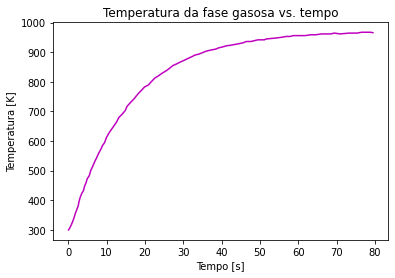

In [ ]:
# Plotando o gráfico dos dados:
import matplotlib.pyplot as plt
plt.plot(dados_sat['t(s)'], dados_sat['T(K)'], 'm-')
# Adicionando texto nos eixos - descrição
plt.xlabel('Tempo [s]')
plt.ylabel('Temperatura [K]')
# Adicionando título para a figura
plt.title('Temperatura da fase gasosa vs. tempo')
# Adicionando uma legenda
ax1.legend()
ax1.grid()

Definindo a função objetivo de estimação de parâmetro:



In [ ]:
def fun_obj_Tsat (x,par):

  '''   Entrada:
        x1 = valores das funções de variáveis independentes
        par = vetor ou lista de parâmetros: 
            par[0]=Tb 
            par[1]= b 
            par[2] = ksat > 0

        Saida:
        fun = valor da função no ponto x
  '''
  # Curva de saturação: 0.877
  #fun = par[0]*(1 - np.exp(-(par[1]*x[0])))

  # Curva logarítmica: 0.957
  #fun = par[0] + par[1]*np.log(x[0])

  # Modelo de crescimento logístico: 0.9949
  fun = par[0]/(1+par[1]*np.exp(-par[2]*x[0]))

  return fun

In [ ]:
# Chute inicial para os valores dos parâmetros:
par_sat = np.array([800.0, 1, 1])
par_sat

array([800.,   1.,   1.])

Iremos agora definir a função de resíduo: 

$$ Δ = y - y_{pred} $$


In [ ]:
def f_res_sat(v_par, dados_sat):
  
  '''Definindo a função de resíduo'''

  n_exp = dados_sat.shape[0]
  v_delta =np.empty(n_exp)
  for k, row in dados_sat.iterrows():
    y = row['T(K)']
    y_pred = fun_obj_Tsat([row['t(s)']], v_par)
    delta = y - y_pred
    v_delta[k] = delta
  return v_delta

In [ ]:
# Definindo o tamanho do vetor de resposta:

n_exp = dados_sat.shape[0]
n_exp

98

In [ ]:
v_par_sat = list(par_sat)
v_par_sat

[800.0, 1.0, 1.0]

In [ ]:
# Testando a função de resíduo:

f_res_sat(v_par_sat, dados_sat)

array([-113.92821918, -185.3271022 , -246.68316319, -301.54414891,
       -334.97630133, -352.0440985 , -363.17393087, -358.67641437,
       -355.79264577, -353.87714615, -352.75119551, -342.06523191,
       -333.09273776, -321.06722542, -314.60474149, -297.24016558,
       -285.28848737, -277.08234968, -267.42594657, -259.10373437,
       -243.66930019, -235.21673576, -225.32425991, -215.39930178,
       -205.47589246, -188.41081951, -172.76529742, -158.53507672,
       -148.57059739, -135.75678456, -120.09346878, -111.54988986,
        -97.30984013,  -83.0694424 ,  -75.94925666,  -67.40500345,
        -57.43668057,  -46.04428948,  -36.07594212,  -28.955692  ,
        -17.56328928,  -10.44303731,   -0.47468321,   12.34177228,
         19.46202537,   29.43037976,   37.97468355,   46.51898734,
         55.06329114,   59.33544304,   66.4556962 ,   70.7278481 ,
         77.84810127,   84.96835443,   90.66455696,   93.51265823,
         99.20886076,  103.48101266,  107.75316456,  110.60126

Agora iremos utilizar o método dos mínimos quadrados na função de resíduo de modo a minimizar o resíduo para os parâmetros testados. 

In [ ]:
# Importando o método de mínimos quadrados:
from scipy.optimize import least_squares

In [ ]:
# Aplicando o método dos mínimos quadrados na função resíduo: 
res_estimacao_sat = least_squares(f_res_sat, np.array(v_par_sat), args=(dados_sat,))
res_estimacao_sat.x

array([9.50203102e+02, 1.82459924e+00, 1.09793824e-01])

In [ ]:
# Resultado dos parâmetros estimados:
resul_sat = res_estimacao_sat.x
resul_sat

array([9.50203102e+02, 1.82459924e+00, 1.09793824e-01])

Logo encontramos:

|C_Novo|
|-------|
$$T_b = 950.2$$
$$b = 1.825$$
$$k_{sat} = 0.1098$$

In [ ]:
# Calculando o y predito:
Y_pred_sat = np.empty(n_exp)
for k, row in dados_sat.iterrows():
  Y_pred_sat[k] = fun_obj_Tsat([row['t(s)']], resul_sat)
Y_pred_sat

array([338.02899786, 347.85868205, 357.80713738, 369.55306589,
       381.43630782, 390.00061359, 400.35323027, 405.5576332 ,
       414.26905472, 424.77740446, 435.33578824, 442.39741362,
       453.01615427, 461.88248346, 474.30945477, 484.96265193,
       497.37810529, 504.46007336, 513.29378474, 522.10099713,
       536.12247189, 544.83292813, 555.22208459, 563.82032517,
       577.4509312 , 589.23532947, 605.8116561 , 623.65472218,
       636.34951361, 651.85774123, 665.45229644, 680.13279894,
       699.89915689, 709.42653887, 718.71122205, 730.28721477,
       743.87757551, 755.69662872, 767.00538155, 775.68676151,
       788.10562948, 802.62924941, 811.70938267, 823.63774084,
       833.92422764, 845.58911828, 856.21569526, 864.13113301,
       870.89961565, 876.67530688, 884.38994944, 889.25189856,
       896.11157917, 902.24088416, 906.47811574, 910.64193318,
       914.93611424, 917.85895935, 922.21821565, 925.47092944,
       927.37635154, 929.59532638, 932.00750825, 933.78

In [ ]:
# Adicionando os dados preditos no dataframe:

dados_sat['Y_pred_sat'] = Y_pred_sat
dados_sat

,t(s),T(K),Y_pred_sat
0,0.068085,299.683544,338.028998
1,0.476596,308.227848,347.858682
2,0.885106,319.620253,357.807137
3,1.361702,335.284810,369.553066
4,1.838298,355.221519,381.436308
...,...,...,...
93,75.302128,964.715190,949.758307
94,76.527660,967.563291,949.814282
95,77.548936,967.563291,949.855509
96,78.706383,967.563291,949.896977


Avaliando a consistência dos parâmetros estimados através de figuras de mérito:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(dados_sat['T(K)'], dados_sat['Y_pred_sat'])
rmse = np.sqrt(mse)


Adicionando um gráfico para observar o ajusete dos dados:

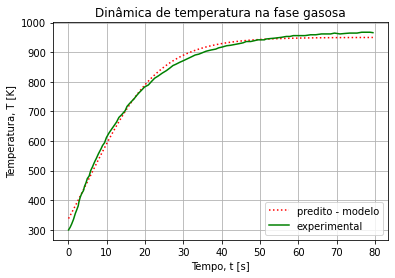

In [ ]:
# Fazendo o gráfico
fig7, ax7 = plt.subplots()
ax7.plot(dados_sat['t(s)'], dados_sat['Y_pred_sat'], 'r:', label='predito - modelo')
ax7.plot(dados_sat['t(s)'], dados_sat['T(K)'], 'g-', label='experimental')
# Adicionando texto nos eixos - descrição
ax7.set_xlabel('Tempo, t [s]')
ax7.set_ylabel('Temperatura, T [K]')
# Adicionando título para a figura
ax7.set_title('Dinâmica de temperatura na fase gasosa')
# Adicionando uma legenda
ax7.legend()
ax7.grid()

In [ ]:
print('Raiz do erro quadrático médio:', rmse)
print('Coeficiente de determinação:', r2_score(dados_sat['T(K)'], dados_sat['Y_pred_sat']))


Raiz do erro quadrático médio: 15.045546787354535
Coeficiente de determinação: 0.9947359077469415


## Etapa 3.5: Adicionando a função de temperatura no modelo do reator proposto.

Função de temperatura: 

$$ T = \frac{a}{(1+b \cdot e^{-k_{sat}t})} $$

Onde os parâmetros estimados foram:

$a = 950.2 $

$b = 1.825 $

$k_{sat} = 0.1098 $


In [ ]:
from scipy import integrate
from scipy.integrate import quad

def Conv_total(t, y, L, S, tm, m0):

  '''Função que calcula a conversão de cada um dos componentes e a conversão total '''
  #
  # Definindo parâmetos cinéticos:
  #
  k = k_c
  E = E_0
  R = 8.315 # J/K.mol ou J/°C.mol
  #
  # Trazendo as funções de densidade e taxa de reação:
  #
  X1 = y[0]
  X2 = y[1]
  X3 = y[2]
  Xt = y[3]
  #
  T = resul_sat[0]/(1.0 + resul_sat[1]*np.exp(-resul_sat[2]*t))
  x_cin = np.array([X1, X2, X3])
  rho = fun_rho(Xt)
  taxa_cin = fun_cin(T, c, k, E, n, x_cin)
  #
  # Formando a função a ser integrada:
  #
  dydt = np.zeros((4,))
  dydt[0] = (c[0]*k[0]*np.exp(-(E[0]/(R*T)))*(1-X1)**n[0])
  dydt[1] = (c[1]*k[1]*np.exp(-(E[1]/(R*T)))*(1-X2)**n[1])
  dydt[2] = (c[2]*k[2]*np.exp(-(E[2]/(R*T)))*(1-X3)**n[2])
  dydt[3] = ((L*S)/(tm*m0))*rho*taxa_cin
  return dydt

In [ ]:
# Valor inicial de conversões: 

y0 = np.array([ 0.0, 0.0, 0.0, 0.0])

In [ ]:
tm = 131 #s
m_alim = 3.5/(60*60)  
Conv_total(0, y0, L[-1], S, tm, m_alim)

array([1.29444306e-07, 1.07445053e-18, 2.57628501e-24, 4.67524035e-04])

In [ ]:
t_span = [0, tm]
tcalc = np.linspace(0,tm,10)
sol_4 = integrate.solve_ivp(Conv_total, t_span, y0, t_eval= tcalc,
              args= (L[-1], S, tm, m_alim))
sol_4

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 20018
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  0.        ,  14.55555556,  29.11111111,  43.66666667,
        58.22222222,  72.77777778,  87.33333333, 101.88888889,
       116.44444444, 131.        ])
 t_events: None
        y: array([[0.        , 0.09904627, 0.72104313, 0.86297925, 0.90489987,
        0.92430261, 0.9356749 , 0.9432894 , 0.94882315, 0.95307012],
       [0.        , 0.07815024, 0.99999956, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.        , 0.00279685, 0.99720899, 0.99991075, 0.99997601,
        0.99998784, 0.99999211, 0.99999423, 0.99999548, 0.9999963 ],
       [0.        , 1.12177497, 1.12250041, 1.12106861, 1.12276228,
        1.12243555, 1.12234681, 1.12065576, 1.12239618, 1.12178399]])
 y_events: None

In [ ]:
dados_4 = pd.DataFrame(sol_4["y"])
dados_4 = dados_4.transpose() 
dados_4

,0,1,2,3
0,0.000000,0.00000,0.000000,0.000000
1,0.099046,0.07815,0.002797,1.121775
2,0.721043,1.00000,0.997209,1.122500
3,0.862979,1.00000,0.999911,1.121069
4,0.904900,1.00000,0.999976,1.122762
5,0.924303,1.00000,0.999988,1.122436
6,0.935675,1.00000,0.999992,1.122347
7,0.943289,1.00000,0.999994,1.120656
8,0.948823,1.00000,0.999995,1.122396
9,0.953070,1.00000,0.999996,1.121784


In [ ]:
# Dinamica da temperatura
tcalc, sol_4.t

(array([  0.        ,  14.55555556,  29.11111111,  43.66666667,
         58.22222222,  72.77777778,  87.33333333, 101.88888889,
        116.44444444, 131.        ]),
 array([  0.        ,  14.55555556,  29.11111111,  43.66666667,
         58.22222222,  72.77777778,  87.33333333, 101.88888889,
        116.44444444, 131.        ]))

In [ ]:
# Adicionando a curva adimensional de temperatura:
npT = tcalc.shape[0]
T_vetor = np.zeros((npT,))
i = 0
for t in tcalc:
  T_vetor[i] = resul_sat[0]/(1.0 + resul_sat[1]*np.exp(-resul_sat[2]*t))
  i += 1
T_vetor

array([336.40280367, 694.04645477, 884.19252478, 936.06720661,
       947.3093739 , 949.61633776, 950.08435379, 950.17907944,
       950.1982427 , 950.20211911])

In [ ]:
np.mean(T_vetor)

854.829849653101

Plotando o gráfico para conferência:

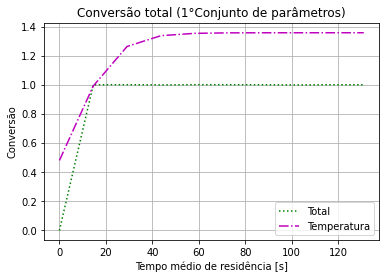

In [ ]:
# Plotando o gráfico
import matplotlib.pyplot as plt
fig8, ax8 = plt.subplots()
ax8.plot(tcalc, dados_4[3]/dados_4[3].iloc[-1], 'g:', label='Total')
ax8.plot(tcalc, T_vetor/T_reator[0], 'm-.', label='Temperatura')
# Adicionando texto nos eixos - descrição
ax8.set_xlabel('Tempo médio de residência [s]')
ax8.set_ylabel('Conversão')
# Adicionando título para a figura
ax8.set_title('Conversão total (1°Conjunto de parâmetros)')
# Adicionando uma legenda
ax8.legend()
ax8.grid()

## Etapa 3.6: Validando o simulador.

Nessa etapa iremos testar o simulador utilizando dados de teste para os parâmetos referentes a tempo de residência, vazão operacional e dimensões do reator. 



O primeiro conjunto de dados foi retirado do estudo de Nkosi et al. (2020). O segundo e o terceiro conjunto de dados foram escolhidos arbritariamente, no entanto, próximos aos dados que poderaim ser utilizados em plantas de pirólise.


|Parâmetro| Conjunto 1|Conjunto 2|Conjunto 3|
|:-------:|:----:|:----:|:----:|
|Comprimento do reator (m)|6|6|2.0|
|Diâmetro do reator (m)|2.8|2.8|1.5|
|Vazão de resíduo de pneu ($kg \ s^{-1})$| 2.42| 20| 20




Os tempos de residência utilizados todos iguais a 131 segundos. 

In [ ]:
L_teste = np.array([6.0, 2.0]) # m
S_teste = np.array([(np.pi * 2.8**2.0)/4.0,(np.pi * 1.5**2.0)/4.0]) # m2
m_alim_teste = np.array([145.31/60.0, 20.0]) #kg/s
tm_teste = np.array([131]) # s

Primeiro conjunto de dados:

In [ ]:
t_span = [0, tm_teste[0]]
tcalc = np.linspace(0,tm_teste[0],10)
sol_5 = integrate.solve_ivp(Conv_total, t_span, y0, t_eval= tcalc,
              args= (L_teste[0], S_teste[0], tm_teste[0], m_alim_teste[0]))
sol_5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 968
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  0.        ,  14.55555556,  29.11111111,  43.66666667,
        58.22222222,  72.77777778,  87.33333333, 101.88888889,
       116.44444444, 131.        ])
 t_events: None
        y: array([[0.        , 0.09904628, 0.72104312, 0.86297924, 0.90489986,
        0.92430269, 0.93567482, 0.94328934, 0.94882311, 0.95307008],
       [0.        , 0.07815043, 0.99999956, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.        , 0.00279685, 0.99720826, 0.99991073, 0.99997601,
        0.99998784, 0.99999211, 0.99999423, 0.99999548, 0.9999963 ],
       [0.        , 1.12352478, 1.12195109, 1.12195122, 1.12195122,
        1.12195122, 1.12195122, 1.12195122, 1.12195122, 1.12195122]])
 y_events: None

In [ ]:
dados_5 = pd.DataFrame(sol_5["y"])
dados_5 = dados_5.transpose() 
dados_5

,0,1,2,3
0,0.000000,0.00000,0.000000,0.000000
1,0.099046,0.07815,0.002797,1.123525
2,0.721043,1.00000,0.997208,1.121951
3,0.862979,1.00000,0.999911,1.121951
4,0.904900,1.00000,0.999976,1.121951
5,0.924303,1.00000,0.999988,1.121951
6,0.935675,1.00000,0.999992,1.121951
7,0.943289,1.00000,0.999994,1.121951
8,0.948823,1.00000,0.999995,1.121951
9,0.953070,1.00000,0.999996,1.121951


In [ ]:
# Adicionando a curva adimensional de temperatura:
npT = tcalc.shape[0]
T_vetor = np.zeros((npT,))
i = 0
for t in tcalc:
  T_vetor[i] = resul_sat[0]/(1.0 + resul_sat[1]*np.exp(-resul_sat[2]*t))
  i += 1
T_vetor

array([336.40280367, 694.04645477, 884.19252478, 936.06720661,
       947.3093739 , 949.61633776, 950.08435379, 950.17907944,
       950.1982427 , 950.20211911])

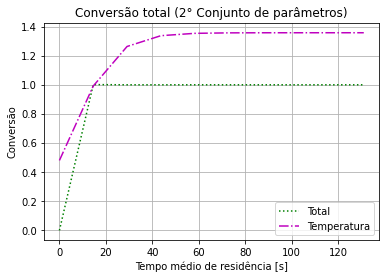

In [ ]:
# Plotando o gráfico normalizado do teste 1:
import matplotlib.pyplot as plt
fig9, ax9 = plt.subplots()
ax9.plot(tcalc, dados_5[3]/dados_5[3].iloc[-1], 'g:', label='Total')
ax9.plot(tcalc, T_vetor/T_reator[0], 'm-.', label='Temperatura')
# Adicionando texto nos eixos - descrição
ax9.set_xlabel('Tempo médio de residência [s]')
ax9.set_ylabel('Conversão')
# Adicionando título para a figura
ax9.set_title('Conversão total (2° Conjunto de parâmetros)')
# Adicionando uma legenda
ax9.legend()
ax9.grid()

Segundo conjunto de dados:


In [ ]:
t_span = [0, tm_teste[0]]
tcalc = np.linspace(0,tm_teste[0],10)
sol_6 = integrate.solve_ivp(Conv_total, t_span, y0, t_eval= tcalc,
              args= (L_teste[0], S_teste[0], tm_teste[0], m_alim_teste[1]))
sol_6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 656
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  0.        ,  14.55555556,  29.11111111,  43.66666667,
        58.22222222,  72.77777778,  87.33333333, 101.88888889,
       116.44444444, 131.        ])
 t_events: None
        y: array([[0.        , 0.09904637, 0.72104313, 0.86297924, 0.90489986,
        0.92430273, 0.93567482, 0.94328934, 0.9488231 , 0.95307008],
       [0.        , 0.07816142, 0.99999956, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.        , 0.00279704, 0.99720856, 0.99991072, 0.99997601,
        0.99998784, 0.99999211, 0.99999423, 0.99999548, 0.9999963 ],
       [0.        , 0.98227602, 1.12195122, 1.12195122, 1.12195122,
        1.12195122, 1.12195122, 1.12195122, 1.12195122, 1.12195122]])
 y_events: None

In [ ]:
dados_6 = pd.DataFrame(sol_6["y"])
dados_6 = dados_6.transpose() 
dados_6

,0,1,2,3
0,0.000000,0.000000,0.000000,0.000000
1,0.099046,0.078161,0.002797,0.982276
2,0.721043,1.000000,0.997209,1.121951
3,0.862979,1.000000,0.999911,1.121951
4,0.904900,1.000000,0.999976,1.121951
5,0.924303,1.000000,0.999988,1.121951
6,0.935675,1.000000,0.999992,1.121951
7,0.943289,1.000000,0.999994,1.121951
8,0.948823,1.000000,0.999995,1.121951
9,0.953070,1.000000,0.999996,1.121951


In [ ]:
# Adicionando a curva adimensional de temperatura:
npT = tcalc.shape[0]
T_vetor = np.zeros((npT,))
i = 0
for t in tcalc:
  T_vetor[i] = resul_sat[0]/(1.0 + resul_sat[1]*np.exp(-resul_sat[2]*t))
  i += 1
T_vetor

array([336.40280367, 694.04645477, 884.19252478, 936.06720661,
       947.3093739 , 949.61633776, 950.08435379, 950.17907944,
       950.1982427 , 950.20211911])

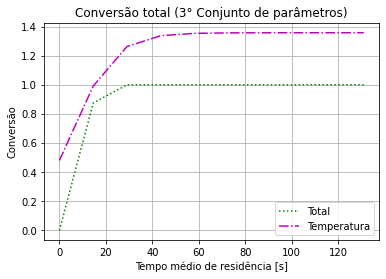

In [ ]:
# Plotando o gráfico normalizado do teste 1:
import matplotlib.pyplot as plt
fig10, ax10 = plt.subplots()
ax10.plot(tcalc, dados_6[3]/dados_6[3].iloc[-1], 'g:', label='Total')
ax10.plot(tcalc, T_vetor/T_reator[0], 'm-.', label='Temperatura')
# Adicionando texto nos eixos - descrição
ax10.set_xlabel('Tempo médio de residência [s]')
ax10.set_ylabel('Conversão')
# Adicionando título para a figura
ax10.set_title('Conversão total (3° Conjunto de parâmetros)')
# Adicionando uma legenda
ax10.legend()
ax10.grid()

Terceiro conjunto de dados:


In [ ]:
t_span = [0, tm_teste[0]]
tcalc = np.linspace(0,tm_teste[0],10)
sol_7 = integrate.solve_ivp(Conv_total, t_span, y0, t_eval= tcalc,
              args= (L_teste[1], S_teste[1], tm_teste[0], m_alim_teste[1]))
sol_7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 662
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([  0.        ,  14.55555556,  29.11111111,  43.66666667,
        58.22222222,  72.77777778,  87.33333333, 101.88888889,
       116.44444444, 131.        ])
 t_events: None
        y: array([[0.        , 0.09904641, 0.72104313, 0.86297924, 0.90489986,
        0.92430262, 0.93567483, 0.94328934, 0.94882311, 0.95307008],
       [0.        , 0.0781938 , 0.99999956, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.        , 0.00279744, 0.99720866, 0.99991073, 0.99997601,
        0.99998784, 0.99999211, 0.99999423, 0.99999548, 0.9999963 ],
       [0.        , 0.20261784, 1.06646448, 1.07466818, 1.07681392,
        1.07777293, 1.0783254 , 1.07869141, 1.07895546, 1.07915701]])
 y_events: None

In [ ]:
dados_7 = pd.DataFrame(sol_7["y"])
dados_7 = dados_7.transpose() 
dados_7

,0,1,2,3
0,0.000000,0.000000,0.000000,0.000000
1,0.099046,0.078194,0.002797,0.202618
2,0.721043,1.000000,0.997209,1.066464
3,0.862979,1.000000,0.999911,1.074668
4,0.904900,1.000000,0.999976,1.076814
5,0.924303,1.000000,0.999988,1.077773
6,0.935675,1.000000,0.999992,1.078325
7,0.943289,1.000000,0.999994,1.078691
8,0.948823,1.000000,0.999995,1.078955
9,0.953070,1.000000,0.999996,1.079157


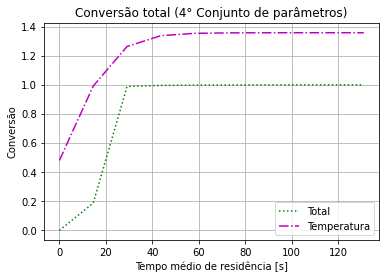

In [ ]:
# Plotando o gráfico normalizado do teste 1:
import matplotlib.pyplot as plt
fig11, ax11 = plt.subplots()
ax11.plot(tcalc, dados_7[3]/dados_7[3].iloc[-1], 'g:', label='Total')
ax11.plot(tcalc, T_vetor/T_reator[0], 'm-.', label='Temperatura')
# Adicionando texto nos eixos - descrição
ax11.set_xlabel('Tempo médio de residência [s]')
ax11.set_ylabel('Conversão')
# Adicionando título para a figura
ax11.set_title('Conversão total (4° Conjunto de parâmetros)')
# Adicionando uma legenda
ax11.legend()
ax11.grid()

## Referências:

AYLÓN, E. et al. Assessment of tire devolatilization kinetics. Journal of Analytical and Applied Pyrolysis, [S. l.], v. 74, p. 259-264, ago. 2005. DOI: 10.1016/j.jaap.2004.09.006. Disponível em: https://www.sciencedirect.com/science/article/abs/pii/S0165237005000288. Acesso em: 20 fev. 2022.

AYLÓN, E. et al. Waste tyre pyrolysis: Modelling of a moving bed reactor. Waste Management, Zaragoza, v. 30, p. 2530-2536, mai. 2010. DOI: doi:10.1016/j.wasman.2010.04.018. Disponível em: https://www.sciencedirect.com/science/article/abs/pii/S0956053X1000245X?via%3Dihub. Acesso em: 20 fev. 2022.

NKOSI, Nhlanhla; MUZENDA, Edison. A Review and Discussion of Waste Tyre Pyrolysis and Derived Products. World Congress on Engineering, Reino Unido, v. 2, p. 1-7, jul. 2014. Disponível em: https://www.researchgate.net/publication/287299539_A_Review_and_Discussion_of_Waste_Tyre_Pyrolysis_and_Derived_Products. Acesso em: 17 fev. 2022.

SCHWALM, Pedro Czamanski; RANGEL, Nicolas L. S. V; MACIEL, Gabriela P. da Silva. Pirólise de pneus inservíveis para fins energéticos: uma revisão dos produtos de pirólise e suas aplicações. Revista Liberato, [S. l.], v. 21, p. 143-158, maio 2020. DOI: 10.31514/rliberato.2020v21n36.p143. Disponível em: https://www.sciencegate.app/document/10.31514/rliberato.2020v21n36.p143. Acesso em: 17 fev. 2022.

WIDELL, H. Industrial-scale biomass combustion plants: engineering issues and operation. Biomass Combustion Science, Technology and Engineering, [S. l.], [s.n], p. 225-277, mar. 2014. DOI: https://doi.org/10.1533/9780857097439.3.225. Disponível em: https://www.sciencedirect.com/science/article/pii/B9780857091314500108?via%3Dihub. Acesso em: 10 mar. 2022.

